<a href="https://colab.research.google.com/github/shlee0619/workStats/blob/main/1127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 짝지은 표본 t-검정 = 대응표본 t-검정

## 직접 계산

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy.stats import t

In [ ]:
# x1 = 사전테스트
# x2 = 사후테스트
x1 = pd.Series([3, 5, 4, 6, 5, 5, 4, 5, 3, 6, 7, 8, 7, 6, 7, 8, 8, 9, 9, 8, 7, 7, 6, 7, 8])
x2 = pd.Series([7, 8, 6, 7, 8, 9, 6, 6, 7, 8, 8, 7, 9, 10, 9, 9, 8, 8, 4, 4, 5, 6, 9, 8, 12])

In [ ]:
print(x1.mean())
print(x2.mean())

6.32
7.52


In [ ]:
# 효과가 있는지 알아보는 문제이므로 사후 테스트 평균이 사전 테스트 평균보다 커야함
# 즉, 단측 검정

In [ ]:
# 차이평균, 차이표준편차, 표본크기
d = x2 - x1;d

,0
0,4
1,3
2,2
3,1
4,3
5,4
6,2
7,1
8,4
9,2


In [ ]:
d_m = d.mean();d_m

1.2

In [ ]:
d_sd = d.std();d_sd

2.4494897427831783

In [ ]:
n = len(d);n

25

In [ ]:
# 검정통계량
# 분자	차이평균
d_m

1.2

In [ ]:
# 분모	표준오차 = 차이표준편차/제곱근(표본크기)
d_sd/np.sqrt(n)

0.48989794855663565

In [ ]:
# 분자/분모
tv = d_m/(d_sd/np.sqrt(n));tv

2.449489742783178

In [ ]:
# 임계값, 유의수준, 자유도, 단측검정
alpha = 0.05
df = n - 1
cv = t.ppf(1 - alpha, df);cv

1.7108820799094275

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 차이가 있다 = 사후 점수가 사전 점수보다 유의하게 높다

True

In [ ]:
# 유의확률
pv = 1 - t.cdf(tv, df);pv

0.010991498522051169

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 차이가 있다 = 사후 점수가 사전 점수보다 유의하게 높다

True

In [ ]:
# 임계값, 유의수준, 자유도, 양측검정
alpha = 0.05
df = n - 1
cv = t.ppf(1 - alpha/2, df);cv

2.0638985616280205

In [ ]:
# 결론
cv < tv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 차이가 있다 = 사후 점수와 사전 점수의 차이가 있다

True

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df))* 2; pv

0.021982997044102337

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 기각역 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 통계적으로 유의한 차이가 있다 = 사후 점수와 사전 점수의 차이가 있다

True

## 함수 이용

In [ ]:
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import t

In [ ]:
# x1 = 사전테스트
# x2 = 사후테스트
x1 = pd.Series([3, 5, 4, 6, 5, 5, 4, 5, 3, 6, 7, 8, 7, 6, 7, 8, 8, 9, 9, 8, 7, 7, 6, 7, 8])
x2 = pd.Series([7, 8, 6, 7, 8, 9, 6, 6, 7, 8, 8, 7, 9, 10, 9, 9, 8, 8, 4, 4, 5, 6, 9, 8, 12])

In [ ]:
# 차이값
d = x2 - x1;d

,0
0,4
1,3
2,2
3,1
4,3
5,4
6,2
7,1
8,4
9,2


In [ ]:
# 정규성 검정
shapiro(d)
# 유의확률이 0.05 보다 작은지 큰지 확인
# 0.05 보다 작으면 귀무가설 기각 = 정규성을 가지지 않음
# 0.05 보다 크면 귀무가설 채택 = 정규성을 가짐

ShapiroResult(statistic=0.9015384164546472, pvalue=0.019820251746116322)

#### 정규성 가지는 경우
- t-test

In [ ]:
# 단측검정
# u후 > u전 => 'greater'
# u후 < u전 => 'less'
from scipy.stats import ttest_rel
# ttest_rel(x2, x1, alternative = 'less')
ttest_rel(x2, x1, alternative = 'greater')

TtestResult(statistic=2.4494897427831783, pvalue=0.01099149852205115, df=24)

In [ ]:
# 단측검정
# u전 > u후 => 'greater'
# u전 < u후 => 'less'
from scipy.stats import ttest_rel
ttest_rel(x1, x2, alternative = 'less')
# ttest_rel(x1, x2, alternative = 'greater')

# 유의수준 0.05 에서 전과 후의 테스트 평균 점수의 차이는 통계적으로 유의하다.

TtestResult(statistic=-2.4494897427831783, pvalue=0.01099149852205115, df=24)

In [ ]:
tv, pv = ttest_rel(x1, x2, alternative = 'less')
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)

검정통계량:  2.4494897427831783
유의확률:  0.01099149852205115


In [ ]:
# u후 > u전 => 'greater'
# u후 < u전 => 'less'
tv, pv = ttest_rel(x2, x1, alternative = 'greater')
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)

검정통계량:  2.4494897427831783
유의확률:  0.01099149852205115


In [ ]:
# 양측검정
from scipy.stats import ttest_rel
ttest_rel(x2, x1)
# ttest_rel(x2, x1, alternative = 'two-sided')

# 유의수준 0.05 에서 전과 후의 테스트 평균 점수의 차이는 통계적으로 유의하다.

TtestResult(statistic=2.4494897427831783, pvalue=0.0219829970441023, df=24)

In [ ]:
tv, pv = ttest_rel(x2, x1)
print("검정통계량: ", tv)
print("유의확률: ", pv)

검정통계량:  2.4494897427831783
유의확률:  0.0219829970441023


In [ ]:
tv, pv = ttest_rel(x1, x2)
print("검정통계량: ", tv)
print("유의확률: ", pv)

검정통계량:  -2.4494897427831783
유의확률:  0.0219829970441023


#### 정규성 가지지 않는 경우

In [ ]:
# 비모수 통계
# 윌콕슨 부호 순위 검정
# u후 > u전 => 'greater'
# u후 < u전 => 'less'
stats.wilcoxon(x2 - x1, alternative="greater")
# stats.wilcoxon(d, alternative="greater")
# 0.05 보다 작으면 귀무가설 기각 = 차이가 있음
# 0.05 보다 크면 귀무가설 채택 = 차이가 없음

# 유의수준 0.05 에서 전과 후의 테스트 평균 점수의 차이는 통계적으로 유의하다.

WilcoxonResult(statistic=230.5, pvalue=0.010203807849078813)

## 문제2

In [ ]:
# 문제2
# x1 = 재활용 전
# x2 = 재활용 후
x1 = pd.Series([20, 6, 12, 34, 55, 43, 54, 24, 33, 21, 34, 33, 54, 23, 33, 44, 65, 43, 53, 22, 34, 32, 44, 17, 28])
x2 = pd.Series([23, 8, 11, 35, 57, 76, 54, 26, 35, 26, 28, 31, 56, 22, 35, 41, 56, 34, 51, 21, 31, 33, 38, 15, 27])

In [ ]:
# 차이평균, 차이표준편차, 표본크기
d = x2 - x1;d

,0
0,3
1,2
2,-1
3,1
4,2
5,33
6,0
7,2
8,2
9,5


In [ ]:
d_m = d.mean();d_m

0.36

In [ ]:
d_sd = d.std();d_sd

7.675067860720624

In [ ]:
n = len(d);n

25

In [ ]:
# 검정통계량
# 분자	차이평균
d_m

0.36

In [ ]:
# 분모	표준오차 = 차이표준편차/제곱근(표본크기)
d_sd/np.sqrt(n)

1.5350135721441247

In [ ]:
# 분자/분모
tv = d_m/(d_sd/np.sqrt(n));tv

0.23452561367072985

In [ ]:
# 임계값, 유의수준, 자유도, 양측검정
alpha = 0.01
df = n - 1
cv = t.ppf(1 - alpha/2, df);cv

2.796939504772804

In [ ]:
# 결론
cv < tv
# 왼쪽 = 채택역 = 귀무가설 채택 = 대립가설 기각 = 차이가 없다
# = 통계적으로 유의한 차이가 없다
# 종이의 양에 변화가 없다

False

In [ ]:
# 유의확률
pv = (1 - t.cdf(tv, df))*2;pv

0.816566228005847

In [ ]:
# 결론
alpha > pv
# 왼쪽 = 채택역 = 귀무가설 채택 = 대립가설 기각 = 차이가 없다
# = 통계적으로 유의한 차이가 없다
# 종이의 양에 변화가 없다

False

## 함수 이용

In [ ]:
# 정규성 검정
shapiro(d)
# 유의확률이 0.05 보다 작은지 큰지 확인
# 0.05 보다 작으면 귀무가설 기각 = 정규성을 가지지 않음
# 0.05 보다 크면 귀무가설 채택 = 정규성을 가짐

ShapiroResult(statistic=0.6403546565348786, pvalue=1.265020938712662e-06)

In [ ]:
# 양측검정
from scipy.stats import ttest_rel
ttest_rel(x2, x1)
# ttest_rel(x1, x2, alternative = 'two-sided')

TtestResult(statistic=0.2345256136707298, pvalue=0.8165662280058471, df=24)

In [ ]:
tv, pv = ttest_rel(x2, x1)
print("검정통계량: ", abs(tv))
print("유의확률: ", pv)

검정통계량:  0.2345256136707298
유의확률:  0.8165662280058471


In [ ]:
# 비모수 통계
# 윌콕슨 부호 순위 검정
# u후 > u전 => 'greater'
# u후 < u전 => 'less'
# stats.wilcoxon(x2 - x1, alternative="greater")
stats.wilcoxon(d, alternative='two-sided')
# 0.01 보다 작으면 귀무가설 기각 = 차이가 있음
# 0.01 보다 크면 귀무가설 채택 = 차이가 없음

# 유의수준 0.01 에서 전과 후의 평균의 차이는 통계적으로 유의하지 않다.

WilcoxonResult(statistic=133.0, pvalue=0.624308038470532)

# 분산분석

## 직접 계산

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy.stats import f

In [ ]:
# x1: 집단1(주당5시간)
# x2: 집단2(주당10시간)
# x3: 집단3(주당20시간)
# 언어발달시험점수
x1 = [87, 86, 76, 56, 78, 98, 77, 66, 75, 67]
x2 = [87, 85, 99, 85, 79, 81, 82, 78, 85, 91]
x3 = [89, 91, 96, 87, 89, 90, 89, 96, 96, 93]

In [ ]:
# 그룹평균
x1_m = np.mean(x1);x2_m = np.mean(x2);x3_m = np.mean(x3)
print(x1_m, x2_m, x3_m)

76.6 85.2 91.6


In [ ]:
# 총평균
t_m = np.mean(x1 + x2 + x3);t_m

84.46666666666667

In [ ]:
# 표본크기
n1 = len(x1);n2 = len(x2);n3 = len(x3)
print(n1, n2, n3)

10 10 10


In [ ]:
# 분산분석표
# between
# 그룹간 변동 = 그룹평균 - 총평균
b1 = x1_m - t_m
b2 = x2_m - t_m
b3 = x3_m - t_m
print(b1, b2, b3)

-7.866666666666674 0.7333333333333343 7.133333333333326


In [ ]:
# 그룹간 변동 제곱
b12 = b1 ** 2
b22 = b2 ** 2
b32 = b3 ** 2
print(b12, b22, b32)

61.88444444444456 0.5377777777777791 50.884444444444334


In [ ]:
# 그룹간 변동 제곱합 = SSB
ssb = sum([b12*n1, b22*n2, b32*n3]);ssb

1133.0666666666666

In [ ]:
# within
# 그룹내 변동 = 관측치 - 그룹평균
w1 = x1 - x1_m
w2 = x2 - x2_m
w3 = x3 - x3_m
print(w1, w2, w3)

[ 10.4   9.4  -0.6 -20.6   1.4  21.4   0.4 -10.6  -1.6  -9.6] [ 1.8 -0.2 13.8 -0.2 -6.2 -4.2 -3.2 -7.2 -0.2  5.8] [-2.6 -0.6  4.4 -4.6 -2.6 -1.6 -2.6  4.4  4.4  1.4]


In [ ]:
# 그룹내 변동 제곱
w12 = w1 ** 2
w22 = w2 ** 2
w32 = w3 ** 2
print(w12, w22, w32)

[1.0816e+02 8.8360e+01 3.6000e-01 4.2436e+02 1.9600e+00 4.5796e+02
 1.6000e-01 1.1236e+02 2.5600e+00 9.2160e+01] [3.2400e+00 4.0000e-02 1.9044e+02 4.0000e-02 3.8440e+01 1.7640e+01
 1.0240e+01 5.1840e+01 4.0000e-02 3.3640e+01] [ 6.76  0.36 19.36 21.16  6.76  2.56  6.76 19.36 19.36  1.96]


In [ ]:
# 그룹내 변동 제곱합 = SSW
ssw = sum(w12 + w22 + w32);ssw

1738.4

In [ ]:
# 자유도
# between => k - 1
# 분자 자유도 = df1
k = 3;df1 = k -1;df1

2

In [ ]:
# within => n - k
# 분모 자유도 = df2
n = n1 + n2 + n3;df2 = n - k;df2

27

In [ ]:
# 총 제곱합 SST = SSB + SSW
sst = ssb + ssw;sst

2871.4666666666667

In [ ]:
# 전체 자유도 n - 1 = k - 1 + n - k
n - 1
k - 1 + n - k

29

In [ ]:
# 평균제곱합
# between => MSB = SSB / df1 = k - 1
# msb = ssb / (k - 1);msb
msb = ssb / df1;msb

566.5333333333333

In [ ]:
# within => MSW = SSW / df2 = n - k
# msw = ssw / (n - k);msw
msw = ssw / df2;msw

64.3851851851852

In [ ]:
# F 검정통계량 = MSB / MSW
fv = msb / msw;fv

8.79912563276576

In [ ]:
# 임계값, 유의수준
# 분산의 비율이므로 우측검정만 고려해도 됨
alpha = 0.05
cv = f.ppf(1 - alpha, df1, df2);cv

3.3541308285291986

In [ ]:
# 결론
cv < fv
# 오른쪽 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 세 그룹의 평균 점수에 차이가 있다.
# 그러나 어느 그룹에서 차이가 있는지 알 수 없다.

True

In [ ]:
# 유의확률
pv = 1 - f.cdf(fv, df1, df2);pv

0.0011418790660784328

In [ ]:
# 결론
alpha > pv
# 오른쪽 = 귀무가설 기각 = 대립가설 채택 = 차이가 있다
# 세 그룹의 평균 점수에 차이가 있다.
# 그러나 어느 그룹에서 차이가 있는지 알 수 없다.

True

## 상자 그림

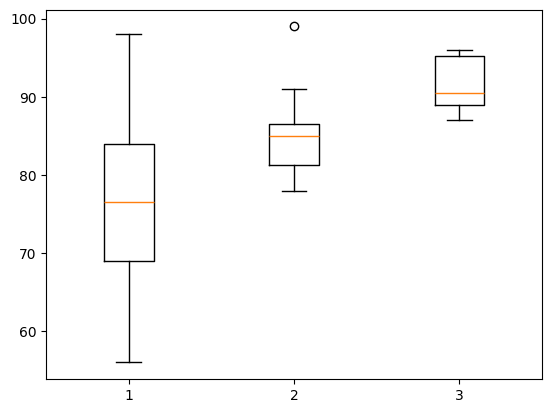

In [ ]:
import matplotlib.pyplot as plt
# 상자 그림
plot_x = [x1, x2, x3]
plt.boxplot(plot_x)
plt.show()

## 가정에 따른 실제 분석

In [ ]:
# 분산분석의 가정
# 1) 정규성
# 2) 등분산
# 3) 독립성

### 정규성 검정

In [ ]:
# 정규성 검정
# 왜도: 절대값 2 미만 / 첨도: 절대값 5 미만이면 정규성을 만족함
# 정규성을 만족하지 않으면 비모수 통계인 Kruskal-Wallis test 사용
# paired t-test 에서는 Wilcoxon test 사용
# indepedent t-test 에서는 Mann-Whitney test 사용
from scipy.stats import shapiro, skew, kurtosis
print(shapiro(x1), skew(x1, bias = False), kurtosis(x1, bias = False))
print(shapiro(x2), skew(x2, bias = False), kurtosis(x2, bias = False))
print(shapiro(x3), skew(x3, bias = False), kurtosis(x3, bias = False))

ShapiroResult(statistic=0.97735123587207, pvalue=0.9494328570477065) 0.07595650731608801 0.24489809048639932
ShapiroResult(statistic=0.9014079079121695, pvalue=0.22701863026907126) 1.2318799025805836 1.8758654720568746
ShapiroResult(statistic=0.864084557023506, pvalue=0.08523915650788468) 0.3653252227728031 -1.5498131476133814


### 정규성 가지지 않는 경우

In [ ]:
# 비모수 통계
# Kruskal-Wallis test
from scipy.stats import kruskal
kruskal(x1, x2, x3)
# 차이가 있음

KruskalResult(statistic=12.639647085101634, pvalue=0.0018002611476946523)

### 등분산 검정

In [ ]:
# 레빈 - 정규성 만족 안함
from scipy.stats import levene
levene(x1, x2, x3)

LeveneResult(statistic=3.2688342585249797, pvalue=0.05354477520716655)

### 등분산 가정

In [ ]:
# 일원분산분석
# 등분산 가정
from scipy.stats import f_oneway
f_oneway(x1, x2, x3)

F_onewayResult(statistic=8.799125632765763, pvalue=0.0011418790660784205)

### 사후검정

In [ ]:
# 사후 검정 = 개별 그룹 간 차이 확인
# 등분산 가정하면 Tukey, Duncan, Scheffe 사용 가능함
# statsmodels의 Tukey test를 하기 위해서는 dataframe의 형태를 변경해줘야 함
import pandas as pd
data = pd.DataFrame({"group": ["group1"] * len(x1) + ["group2"] * len(x2) + ["group3"] * len(x3),
                    "score": x1 + x2 + x3})
data

,group,score
0,group1,87
1,group1,86
2,group1,76
3,group1,56
4,group1,78
5,group1,98
6,group1,77
7,group1,66
8,group1,75
9,group1,67


In [ ]:
# 사후검정 Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(data['score'], data['group'], alpha=0.05)
print(posthoc)
# 집단1과 집단3의 차이가 있다.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
group1 group2      8.6 0.0596 -0.2973 17.4973  False
group1 group3     15.0 0.0008  6.1027 23.8973   True
group2 group3      6.4 0.1941 -2.4973 15.2973  False
----------------------------------------------------


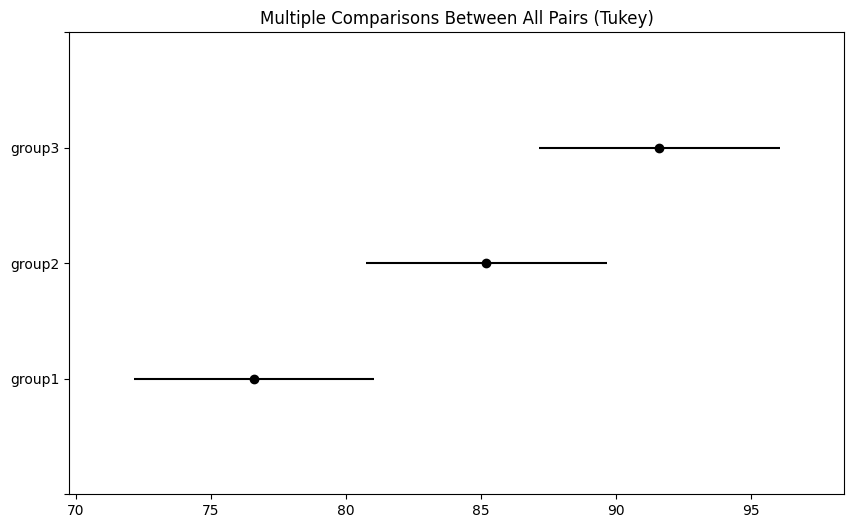

In [ ]:
fig = posthoc.plot_simultaneous()
# 그룹 1과 3은 겹치지 않아서 차이가 있음
# 집단1과 집단3의 차이가 있다.

### 이분산가정

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 15.9 MB/s eta 0:00:00


In [ ]:
# 등분산 가정할 수 없으면 Welch’s ANOVA
from pingouin import welch_anova
welch_anova(dv='score', between='group', data = data)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,15.249013,9.678883,0.001933,0.394595


### 사후검정

In [ ]:
# 등분산 가정할 수 없으면 사후검정도 다른 것을 사용해야 함
# Dunnett's T3, Games-Howell 등의 방법
# 보편적으로 Games-Howell
from pingouin import pairwise_gameshowell
pairwise_gameshowell(dv = 'score', between = 'group', data = data)
# 집단1과 집단3의 차이가 있다.
# 집단2과 집단3의 차이가 있다.

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,group1,group2,76.6,85.2,-8.6,4.260934,-2.018337,13.504224,0.145588,-0.864489
1,group1,group3,76.6,91.6,-15.0,3.933898,-3.813012,10.449039,0.008094,-1.633179
2,group2,group3,85.2,91.6,-6.4,2.236068,-2.862167,13.982798,0.031630,-1.225915


In [ ]:
# Dunnett's T3
from scipy.stats import dunnett
# 실험군
samples = [x2, x3]
# 대조군
control = x1
dunnett(*samples, control=control)
# 집단1과 집단2의 차이가 있다.
# 집단1과 집단3의 차이가 있다.

DunnettResult(statistic=array([2.39657199, 4.18006742]), pvalue=array([0.04363109, 0.00057073]))

In [ ]:
# 실험군
samples = [x1, x3]
# 대조군
control = x2
dunnett(*samples, control=control)
# 집단1과 집단2의 차이가 있다.

DunnettResult(statistic=array([-2.39657199,  1.78349543]), pvalue=array([0.04359663, 0.15019289]))

# 문제 풀이

## 문제2

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from scipy.stats import f

In [ ]:
# 문제2
# x1: 집단1(평균연습15시간미만)
# x2: 집단2(평균연습15~25시간)
# x3: 집단3(평균연습25시간이상)
# 100야드자유형시간기록
x1 = [58.7, 55.3, 61.8, 49.5, 64.5, 61, 65.7, 51.4, 53.6, 59]
x2 = [64.4, 55.8, 58.7, 54.7, 52.7, 67.8, 61.6, 58.7, 54.6, 51.5, 54.7, 61.4, 56.9]
x3 = [68, 65.9, 54.7, 53.6, 58.7, 58.7, 65.7, 66.5, 56.7, 55.4, 51.5, 54.8, 57.2]

In [ ]:
# 그룹평균
x1_m = np.mean(x1);x2_m = np.mean(x2);x3_m = np.mean(x3)
print(x1_m, x2_m, x3_m)

58.05 57.96153846153846 59.03076923076923


In [ ]:
# 총평균
t_m = np.mean(x1 + x2 + x3);t_m

58.37222222222223

In [ ]:
# 표본크기
n1 = len(x1);n2 = len(x2);n3 = len(x3)
print(n1, n2, n3)

10 13 13


In [ ]:
# 분산분석표
# between
# 그룹간 변동 = 그룹평균 - 총평균
b1 = x1_m - t_m
b2 = x2_m - t_m
b3 = x3_m - t_m
print(b1, b2, b3)

-0.32222222222222996 -0.4106837606837672 0.6585470085470035


In [ ]:
# 그룹간 변동 제곱
b12 = b1 ** 2
b22 = b2 ** 2
b32 = b3 ** 2
print(b12, b22, b32)

0.10382716049383214 0.1686611512893618 0.43368416246620717


In [ ]:
# 그룹간 변동 제곱합 = SSB
ssb = sum([b12*n1, b22*n2, b32*n3]);ssb

8.86876068376072

In [ ]:
# within
# 그룹내 변동 = 관측치 - 그룹평균
w1 = x1 - x1_m
w2 = x2 - x2_m
w3 = x3 - x3_m
print(w1, w2, w3)

[ 0.65 -2.75  3.75 -8.55  6.45  2.95  7.65 -6.65 -4.45  0.95] [ 6.43846154 -2.16153846  0.73846154 -3.26153846 -5.26153846  9.83846154
  3.63846154  0.73846154 -3.36153846 -6.46153846 -3.26153846  3.43846154
 -1.06153846] [ 8.96923077  6.86923077 -4.33076923 -5.43076923 -0.33076923 -0.33076923
  6.66923077  7.46923077 -2.33076923 -3.63076923 -7.53076923 -4.23076923
 -1.83076923]


In [ ]:
# 그룹내 변동 제곱
w12 = w1 ** 2
w22 = w2 ** 2
w32 = w3 ** 2
print(w12, w22, w32)

[ 0.4225  7.5625 14.0625 73.1025 41.6025  8.7025 58.5225 44.2225 19.8025
  0.9025] [41.45378698  4.67224852  0.54532544 10.63763314 27.68378698 96.79532544
 13.23840237  0.54532544 11.29994083 41.75147929 10.63763314 11.82301775
  1.12686391] [80.44710059 47.18633136 18.75556213 29.49325444  0.10940828  0.10940828
 44.47863905 55.78940828  5.43248521 13.18248521 56.71248521 17.89940828
  3.35171598]


In [ ]:
# 그룹내 변동 제곱합 = SSW
ssw = sum(w12) + sum(w22 + w32);ssw

914.0634615384616

In [ ]:
# 자유도
# between => k - 1
# 분자 자유도 = df1
k = 3;df1 = k -1;df1

2

In [ ]:
# within => n - k
# 분모 자유도 = df2
n = n1 + n2 + n3;df2 = n - k;df2

33

In [ ]:
# 총 제곱합 SST = SSB + SSW
sst = ssb + ssw;sst

922.9322222222223

In [ ]:
# 전체 자유도 n - 1 = k - 1 + n - k
n - 1
k - 1 + n - k

35

In [ ]:
# 평균제곱합
# between => MSB = SSB / df1 = k - 1
# msb = ssb / (k - 1);msb
msb = ssb / df1;msb

4.43438034188036

In [ ]:
# within => MSW = SSW / df2 = n - k
# msw = ssw / (n - k);msw
msw = ssw / df2;msw

27.698892773892776

In [ ]:
# F 검정통계량 = MSB / MSW
fv = msb / msw;fv

0.1600923321404358

In [ ]:
# 임계값, 유의수준, 우측검정만 고려
alpha = 0.05
cv = f.ppf(1 - alpha, df1, df2);cv

3.2849176510382883

In [ ]:
# 결론
cv < fv
# 연습시간에 따른 그룹에서는 자유형 시간 기록에 차이가 없다.

False

In [ ]:
# 유의확률
pv = 1 - f.cdf(fv, df1, df2);pv

0.8527228755700839

In [ ]:
# 결론
alpha > pv
# 연습시간에 따른 그룹에서는 자유형 시간 기록에 차이가 없다.

False

### 상자그림

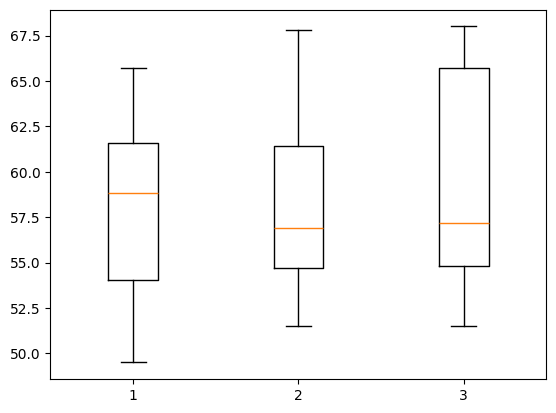

In [ ]:
import matplotlib.pyplot as plt
# 상자그림
plot_x = [x1, x2, x3]
plt.boxplot(plot_x)
plt.show()

### 함수 이용

In [ ]:
# 정규성 검정
# 왜도: 절대값 2 미만 / 첨도: 절대값 5 미만이면 정규성을 만족함
# 정규성을 만족하지 않으면 비모수 통계인 Kruskal-Wallis test 사용
# t-test 에서는 Wilcoxon test 사용
from scipy.stats import shapiro, skew, kurtosis
print(shapiro(x1), skew(x1, bias = False), kurtosis(x1, bias = False))
print(shapiro(x2), skew(x2, bias = False), kurtosis(x2, bias = False))
print(shapiro(x3), skew(x3, bias = False), kurtosis(x3, bias = False))

ShapiroResult(statistic=0.9607495637930942, pvalue=0.7943851613436624) -0.19768159594076745 -1.1172223725837256
ShapiroResult(statistic=0.9467733244340414, pvalue=0.5502983178811278) 0.7062121885393362 -0.09828735885810769
ShapiroResult(statistic=0.8846263190463599, pvalue=0.08240350197855316) 0.5389063816164447 -1.2490771859424863


In [ ]:
# 등분산 검정
# 레빈 - 정규성 만족 안함
from scipy.stats import levene
levene(x1, x2, x3)

LeveneResult(statistic=0.14772950099612533, pvalue=0.8632317460123762)

In [ ]:
# 일원분산분석
# 등분산 가정
from scipy.stats import f_oneway
f_oneway(x1, x2, x3)

F_onewayResult(statistic=0.16009233214043544, pvalue=0.8527228755700833)

### 사후검정할 필요 없지만 Scheffe 를 사용하고 싶다면

In [ ]:
import pandas as pd
data = pd.DataFrame({"group": ["group1"] * len(x1) + ["group2"] * len(x2) + ["group3"] * len(x3),
                    "time": x1 + x2 + x3})
data.head()

,group,time
0,group1,58.7
1,group1,55.3
2,group1,61.8
3,group1,49.5
4,group1,64.5


In [ ]:
# https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_scheffe.html

In [ ]:
!pip install scikit_posthocs

In [ ]:
import scikit_posthocs as sp
sp.posthoc_scheffe(data, val_col='time', group_col='group')

,group1,group2,group3
group1,1.000000,0.999202,0.906783
group2,0.999202,1.000000,0.874941
group3,0.906783,0.874941,1.000000


## 문제3

In [ ]:
# 문제3
# x1: 컬러
# x2: 흑백
# x3: 조합(컬러와 흑백)
# 제품의 매력도
x1 = [10, 8, 7, 8, 9, 6, 7, 6, 6, 7, 8, 7, 6, 5, 6, 7, 7]
x2 = [4, 5, 4, 3, 3, 4, 5, 6, 5, 7, 6, 5, 4, 5, 4, 4, 3]
x3 = [9, 8, 8, 9, 8, 7, 8, 9, 9, 10, 10, 9, 8, 9, 10, 10, 8]

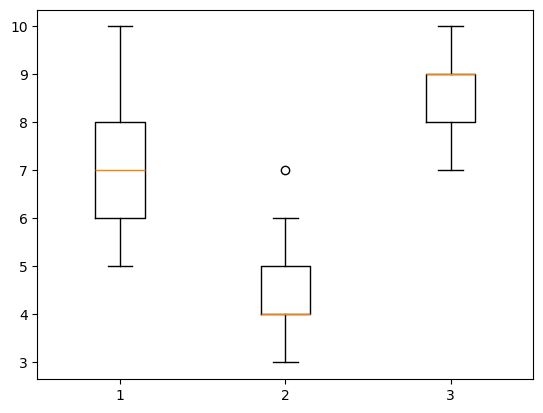

In [ ]:
import matplotlib.pyplot as plt
# 상자그림
plot_x = [x1, x2, x3]
plt.boxplot(plot_x)
plt.show()

In [ ]:
# 정규성 검정
# 왜도: 절대값 2 미만 / 첨도: 절대값 5 미만이면 정규성을 만족함
# 정규성을 만족하지 않으면 비모수 통계인 Kruskal-Wallis test 사용
# paired t-test 에서는 Wilcoxon test 사용
# indepedent t-test 에서는 Mann-Whitney test 사용
from scipy.stats import shapiro, skew, kurtosis
print(shapiro(x1), skew(x1, bias = False), kurtosis(x1, bias = False))
print(shapiro(x2), skew(x2, bias = False), kurtosis(x2, bias = False))
print(shapiro(x3), skew(x3, bias = False), kurtosis(x3, bias = False))

ShapiroResult(statistic=0.9188281717419562, pvalue=0.14108511682700375) 0.7495616018005272 0.6767838071504872
ShapiroResult(statistic=0.9141928139608247, pvalue=0.11777152553276077) 0.5149156862392628 -0.027845167271885796
ShapiroResult(statistic=0.8779567652455776, pvalue=0.02946715150783683) -0.05384913678331715 -0.7748721694667631


In [ ]:
# 등분산 검정
# 레빈 - 정규성 만족 안함
from scipy.stats import levene
levene(x1, x2, x3)

LeveneResult(statistic=0.29149797570850183, pvalue=0.7484566821902545)

In [ ]:
# 분산분석
# 등분산 가정
from scipy.stats import f_oneway
f_oneway(x1, x2, x3)
# 3가지 형태의 샘플 제품의 매력이 유의하게 다르다, 어느 제품 간의 차이가 있는지 모른다.

F_onewayResult(statistic=63.628282828282835, pvalue=3.1739974229954e-14)

In [ ]:
# 사후 검정 = 개별 그룹 간 차이 확인
# 등분산 가정하면 Tukey, Duncan, Scheffe 사용 가능함
# statsmodels의 Tukey test를 하기 위해서는 dataframe의 형태를 변경해줘야 함
import pandas as pd
data = pd.DataFrame({"group": ["group1"] * len(x1) + ["group2"] * len(x2) + ["group3"] * len(x3),
                    "attractiveness": x1 + x2 + x3})
data.head()

,group,attractiveness
0,group1,10
1,group1,8
2,group1,7
3,group1,8
4,group1,9


In [ ]:
# 사후검정 Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(data['attractiveness'], data['group'], alpha=0.05)
print(posthoc)
# 집단1과 집단2의 차이가 있다.
# 집단1과 집단3의 차이가 있다.
# 집단2과 집단3의 차이가 있다.

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
group1 group2  -2.5294    0.0 -3.4431 -1.6157   True
group1 group3   1.7059 0.0001  0.7922  2.6196   True
group2 group3   4.2353    0.0  3.3216   5.149   True
----------------------------------------------------


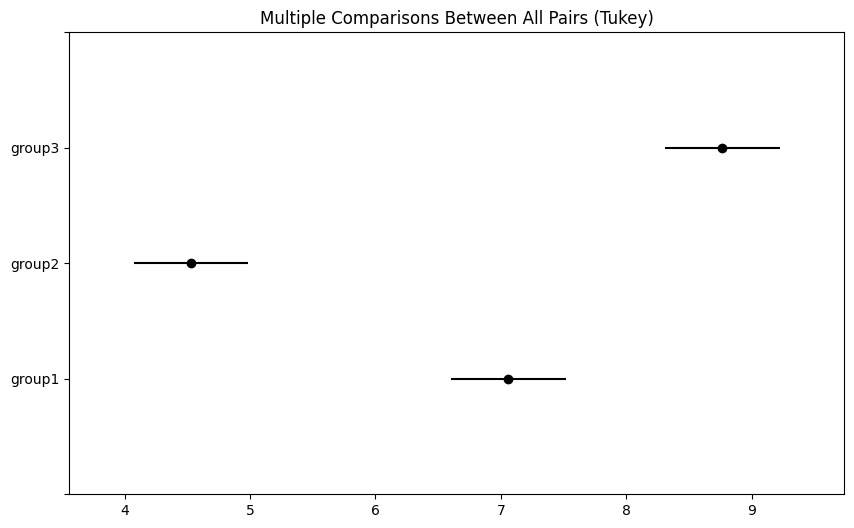

In [ ]:
fig = posthoc.plot_simultaneous()
# 집단1과 집단2의 차이가 있다.
# 집단1과 집단3의 차이가 있다.
# 집단2과 집단3의 차이가 있다.

# 상관분석

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후에 런타임 재시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and direc

In [ ]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

## 상관계수

In [ ]:
# 라이브러리 불러오기
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = [2, 4, 5, 6, 4, 7, 8, 5, 6, 7]
y = [3, 2, 6, 5, 3, 6, 5, 4, 4, 5]

In [ ]:
# 평균
x_m = np.mean(x);y_m = np.mean(y)
print(x_m, y_m)

5.4 4.3


In [ ]:
# 편차
x_dev = x - x_m;y_dev = y - y_m
print(x_dev, y_dev)

[-3.4 -1.4 -0.4  0.6 -1.4  1.6  2.6 -0.4  0.6  1.6] [-1.3 -2.3  1.7  0.7 -1.3  1.7  0.7 -0.3 -0.3  0.7]


In [ ]:
# x편차와 y편차 곱
xy_dev = x_dev * y_dev;xy_dev

array([ 4.42,  3.22, -0.68,  0.42,  1.82,  2.72,  1.82,  0.12, -0.18,
        1.12])

In [ ]:
# 편차제곱
x_dev2 = x_dev ** 2;y_dev2 = y_dev ** 2
print(x_dev2, y_dev2)

[11.56  1.96  0.16  0.36  1.96  2.56  6.76  0.16  0.36  2.56] [1.69 5.29 2.89 0.49 1.69 2.89 0.49 0.09 0.09 0.49]


In [ ]:
# 상관계수
# 분자 = x편차와 y편차 곱의 합
sum(xy_dev)

14.799999999999997

In [ ]:
# 분모 = 제곱근(x편차제곱합*y편차제곱합)
np.sqrt(sum(x_dev2) * sum(y_dev2))

21.383170952877872

In [ ]:
# 분자/분모
rxy = sum(xy_dev) / np.sqrt(sum(x_dev2) * sum(y_dev2));rxy
# 해석	1) 방향: 양수이므로 양의 상관관계, 직접 상관관계
#       2) 강도: 0.6 ~ 0.8 이므로 강한 크기의 상관관계

0.6921330813196406

In [ ]:
# 함수로 상관계수 구하기
rxy = pearsonr(x, y)[0];rxy

0.6921330813196409

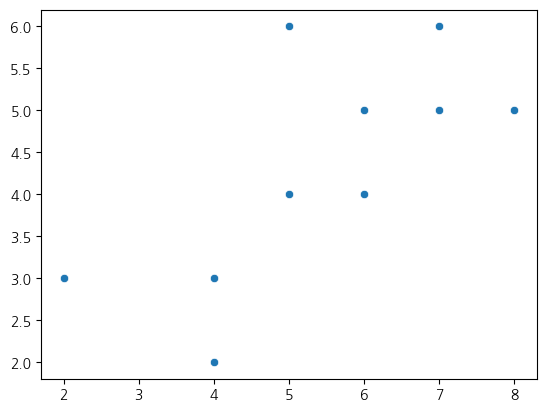

In [ ]:
# 산점도
sns.scatterplot(x = x, y = y)
plt.show()